## Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
%matplotlib inline  
from os.path import exists, join
import h5py
import random as rn
import os

## Import Dataset:

In [2]:
import h5py
with h5py.File('1.hdf5','r') as hdf:
    ls = list(hdf.keys())
    print(ls)
    data1 = hdf.get('data_test')
    data2 = hdf.get('data_train')
    data3 = hdf.get('labels_test')
    data4 = hdf.get('labels_train')

    x_test = np.array(data1)
    x_train = np.array(data2)
    y_test = np.array(data3)
    y_train = np.array(data4)
    print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

OSError: Unable to open file (unable to open file: name = '1.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=0)

NameError: name 'train_test_split' is not defined

## SVM Classifier:

In [ ]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc
# Run classifier
classifier = svm.SVC(kernel='rbf', probability=True)
probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Class Prediction:

In [ ]:
y_predict = classifier.predict(x_test)

## Confusion Matrix Generation:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict))
confusion = pd.DataFrame(cm)
confusion

,0,1
0,15144,235
1,917,3704


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     15379
         1.0       0.94      0.80      0.87      4621

    accuracy                           0.94     20000
   macro avg       0.94      0.89      0.91     20000
weighted avg       0.94      0.94      0.94     20000



In [ ]:
total=sum(sum(cm))

In [ ]:
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.9424
Sensitivity :  0.8015581043064272
Specificity :  0.984719422589245


## AUC-ROC

In [ ]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9805117918029262


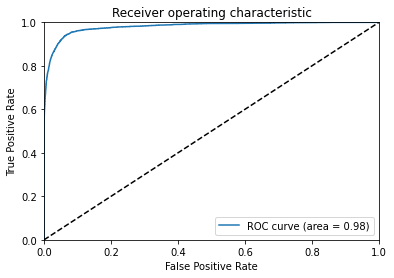

In [ ]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

## Precision-Recall Curve

Average precision-recall score: 0.96


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

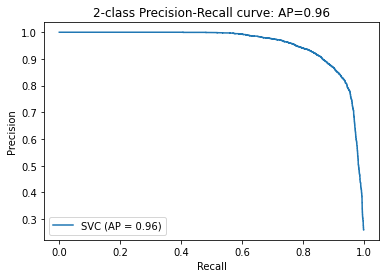

In [ ]:
y_score = classifier.decision_function(x_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))